# Introduction

Hamiltonian dynamics is used to construct MCMC. A Hamiltonian function is defined in terms of the probability distribution we wish to sample from. In addition to “position” variables, an  auxiliary “momentum” variables which typically have independent Gaussian distributions is introduced.

Hamiltonian dynamics can be visualized as  a frictionless puck that slides over a surface of varying height.

The state of this system consists of:

1- The position of the puck, given by a 2D vector x

2- The momentum of the puck (its mass times its velocity), given by a 2D vector p.


### Energy
Potential energy, U(x), of the puck is proportional to the height of the surface at its current position,

Kinetic energy, K(p)= $\frac{1}{2}mv^{2}$ 

$p=mv$ $\implies K(p)=\frac{p^{2}}{2m}$ , where m is the mass of the puck. 


On a level part of the surface, the puck moves at a constant velocity, equal to p/m. 

If it encounters a rising slope, the puck’s momentum allows it to continue, with its kinetic energy decreasing and its potential energy increasing, until the kinetic energy (and hence p) is zero, at which point it will slide back down (with kinetic energy increasing and potential energy decreasing).

$$H(x,p)=U(x)+K(p)=constant$$

### Hamiltonian Dynamic equations

 $$ \frac{\partial{x_i}}{\partial{t}}=\frac{K(p)}{\partial{p_{i}}}     .......(1)$$ 
   
 $$ \frac{\partial{p_i}}{\partial{t}}=-\frac{U(p)}{\partial{x_{i}}}    .......(2)$$ 

 ### Time discretization using leapfrog

The differential equations of Hamiltonian dynamics are discretized for computer implementation using "leapfrog".

For L steps: 

$$ (2) \implies \frac{p_i(t+\frac{\delta}{2})-p_i(t)}{\frac{\delta}{2}}=-\frac{\partial{U}}{\partial{x_i(t)}}$$

$$ \implies p_i(t+\frac{\delta}{2})=p_i(t)-\frac{\delta}{2}\frac{\partial{U}}{\partial{x_i(t)}} .... (*)  $$

<center>================================================</center>

$$ (1) \implies \frac{x_i(t+\delta)-x_i(t)}{\delta}=-\frac{\partial{K}}{\partial{p_i(t+\frac{\delta}{2})}}$$
$$ \implies x_i(t+\delta)=x_i(t)+\delta\frac{\partial{K}}{\partial{p_i(t+\frac{\delta}{2})}} .... (**) $$

<center>================================================</center>

$$ \frac{p_i(t+\delta))-p_i(t+\frac{\delta}{2}}{\frac{\delta}{2}}=-\frac{\partial{U}}{\partial{x_i(t+\delta)}}$$

$$ \implies p_i(t+\delta)=p_i(t+\frac{\delta}{2})-\frac{\delta}{2}\frac{\partial{U}}{\partial{x_i(t+\delta)}} .... (***)  $$
<center>================================================</center>

##### Notice that $\delta$ and L are hyperparameters needed to be tuned to acheive good performance

### How is H(x,p) used to explore the target posterior distribution P(x)?

We aim to approximate the target posterior distribution P(x) using HMC. in this method the samples x are not drawn from a standard distribution as normal but jointly generated with other samples p . So there are two types of samples: position samples x and momentum samples p. These types are not drawn directly from a joint distribution P(x,p) but using energy functions described in the dynamics equations. Before we go generate such samples we need to relate each energy function to a probability disyribution using the concept of a canonical distribution from statistical mechanics.

1- Let us link the target distribution of the variable of interest to the potential energy U(x):
Given some energy function, U(x), for the state, x, of some physical system, the canonical distribution over states has probability or probability density function

$$P(x)=\frac{1}{z}exp({\frac{-U(x)}{T}})$$

T is the temprature. Z is a normalizing faactor so P(x) sums to 1. 

For T=1, z is any is any convenient positive constant

$ U(x)=-logp(x)=-log(prior \times likelihood)$



2- Since the p samples will be ignored, We define independent Gaussian distributions for p

 $ K(p)=-logp(p)$
 
 $ K(p)=p^{T}Mp$

M is a $ d \times d$ giagonal matrix (independent Gaussian) with diagonal entries $m_1, ....m_d$

$$ K(p)=\sum_{i=1}^{d}\frac{p_{i}^{2}}{2m_i}$$

The d momentum variables are independent, with $p_i$ having mean zero and variance $m_i$

3- The Hamiltonian is an energy function for the joint state of “position”, q, and “momentum”, p, and so defines a joint distribution for them, as follows:
$$P(x,p)=\frac{1}{z}exp({\frac{-H(x,p)}{T}})$$

$H(x,p)=U(x)+K(p)$ 

$$P(x,p)=\frac{1}{z}exp({\frac{-U(x)}{T}})exp({\frac{-K(p)}{T}})$$

x and p are independent. 
 
Notice here that we need to differentiate U(x) and K(p) with respoect to x and p respectively. This means that the partial derivatives of the log of the density functions $logP(x)\hspace{0.3cm} \text{and} \hspace{0.3cm}logP(p)$ must therefore exist.

In each iteration of the HMC algorith, x and p are changed but H(x,p) remains invariant and consequently P(x,p) and P(x) remains invariant. 




U(x) will be defined to be minus the log probability density of the distribution for x that we wish to sample.


H(x,p) will be defined to be minus the log of the joint probability density of the distribution for x and p. 


## Energy conservation

$ H(x,p)$ is invariant $\implies H(x_{old}, y_{old})=H(x_{new}, y_{new})$

$\implies H(x_{old}, y_{old})-H(x_{new}, y_{new})=0$

$\implies \alpha=e^{H(x_{old}, y_{old})-H(x_{new}, y_{new})}=1$


The leapfrog mthod 

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import scipy.linalg as la

Suppose that the target distribution (posterior) can be given as a bivariate normal centered at zero with a covariance matrix 
$$ M = \begin{bmatrix}
       1. & 0.8    \\[0.3em]
       0.8 & 1. \\[0.3em]
      \end{bmatrix}$$


/home/bashar/anaconda3/envs/conda_env/lib/python3.6/site-packages/seaborn/distributions.py:645: UserWarning: Passing a 2D dataset for a bivariate plot is deprecated in favor of kdeplot(x, y), and it will cause an error in future versions. Please update your code.
  warnings.warn(warn_msg, UserWarning)


[-3.5, 3.5, -3.5, 3.5]

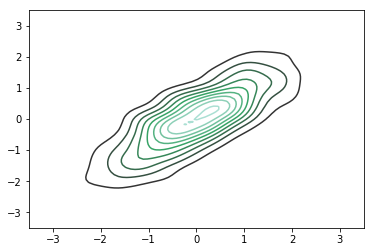

In [5]:
M = np.array([[1,0.8],[0.8,1.]])
mu = np.zeros(2)
ys = np.random.multivariate_normal(mu, M, 1000)

sns.kdeplot(ys)
plt.axis([-3.5,3.5,-3.5,3.5])



### Potential energy

The potential energy as a function of position (x) which is the variable of interest i.e the variable to approximte its posterior distribution.

U_x = -log posterior. The posterior is given in our case as the 2D Gaussian distribution with mu and M. 
$U(x)=-log(MVN)=0.5 x M^{-1}x^{T}$

In [17]:
def U_x(inv_M,x):
    #inv_M: The inverse of the covariance matrix
    return 0.5*x @ inv_M @ x

### Kinetic energy

The kinetic energy $K(p)$ is a function of the auxiliary variable (momentum) which is going to be ignored. 

Let us define P(p) as a 2D standard Gaussian with zero mean and covariance matrix: 
$$ M = \begin{bmatrix}
       1. & 0.    \\[0.3em]
       0. & 1. \\[0.3em]
      \end{bmatrix}$$

$K(p)=-log(MVN)=0.5 p M^{-1}p^{T}=0.5p^{2}$


In [18]:
def K_p(p):
    return 0.5*p @p

In [22]:
# This function will be used to accept/reject samples generated using Hamiltonian dynamics
def energy_diff(inv_Mx0, p0, x, p):
    """Total energy."""
    return U_x(inv_M,x0)+K_p(p0) - U_x(inv_M,x)+K_p(p)

In [30]:
# This function is used to generate one sample of the position variable. L (number of steps) and h (step size) are hyperparameters 
def leapfrog(inv_M, x, p, h, N):
    # Make a half step for momentum at the beginning
    p = p - h/2 * inv_M @ x
    for i in range(N):
        # Make a full step for the position
        x = x + h * p 
        # Make a full step for the momentum, except at end of trajectory
        if i!=N-1:
            p = p - h * inv_M @ x

    #x = x + h * p
    # Make a half step for momentum at the end.
    p = p - h/2 * inv_M @ x

    return x, p

In [31]:
niter = 1000  # Number of samples to be generated to approximate the target posterior distribution
h = 0.01
L = 100  # The number of steps used in leapfrog method to implement time discritiation of the Hamiltonian equations. 

M=np.array([[1.,0.8],[0.8,1.]])
inv_M = la.inv(M)

orbit = np.zeros((niter+1, 2))
x = np.array([-3,3])
orbit[0] = x
 
for k in range(niter):
    p0 = np.random.normal(0,1,2)   # We set a new random variable of the momentum variable to generate one sample of the position variable
    # using the leapfrog method
    x, p = leapfrog(inv_M, x, p0, h, L)
   

    # accept-reject
    x0 = orbit[k]
    a = np.exp(energy_diff(x0, p0, x, p))
    r = np.random.rand()

    if r < a:
        orbit[k+1] = x
    else:
        orbit[k+1] = x0

/home/bashar/anaconda3/envs/conda_env/lib/python3.6/site-packages/seaborn/distributions.py:645: UserWarning: Passing a 2D dataset for a bivariate plot is deprecated in favor of kdeplot(x, y), and it will cause an error in future versions. Please update your code.
  warnings.warn(warn_msg, UserWarning)


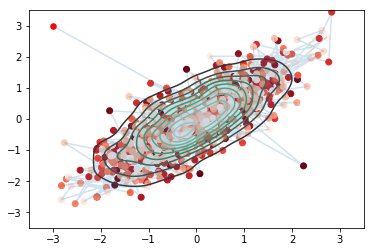

In [32]:

sns.kdeplot(orbit)
plt.plot(orbit[:,0], orbit[:,1], alpha=0.2)
plt.scatter(orbit[:1,0], orbit[:1,1],  c='red', s=30)
plt.scatter(orbit[1:,0], orbit[1:,1],  c=np.arange(niter)[::-1], cmap='Reds')
plt.axis([-3.5,3.5,-3.5,3.5])
pass


Ref.:
- Chapter 5 of the Handbook of Markov Chain Monte Carlo Edited by Steve Brooks, Andrew Gelman, Galin Jones, and Xiao-Li Meng Chapman & Hall / CRC Press, 2011
- http://people.duke.edu/~ccc14/sta-663-2016/16B_AuxiliaryVariableMCMC.html
